In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

In [2]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3287 non-null   object 
 1   avg     3287 non-null   float64
 2   min     3287 non-null   float64
 3   max     3287 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.8+ KB


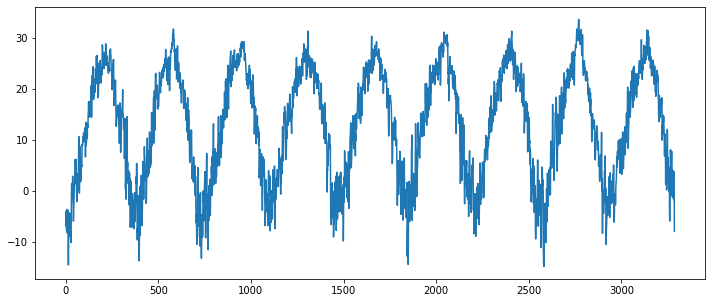

In [3]:
temp_data = temp[['avg']]

plt.figure(figsize=(12,5))
plt.plot(temp_data)
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(-1,1))
temp_data = scaler.fit_transform(temp_data)

In [6]:
train = temp_data[0:2557]
test = temp_data[2557:]

In [47]:
def create_dataset(time_data, look_back=1):
    data_X, data_y = [],[]
    for i in range(len(time_data)-look_back):
        data_X.append(time_data[i:(i+look_back),0])
        data_y.append(time_data[i+look_back,0])
    return np.array(data_X), np.array(data_y)

In [58]:
look_back = 180

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

In [59]:
train_X =np.reshape(train_X, (train_X.shape[0], train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1],1))

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180, 1), (2377,), (550, 180, 1), (550,))

In [50]:
model = Sequential()
model.add(Bidirectional(LSTM(64,input_shape = (None, 1))))
model.add(Dense(1, activation = 'tanh'))

#model.summary()

model.compile(loss = 'mean_squared_error', optimizer='adam')

In [51]:
%%time
hist = model.fit(train_X, train_y,epochs = 200, batch_size = 180,validation_data = (test_X, test_y))

Epoch 1/200
14/14 [==============================] - 11s 135ms/step - loss: 0.1905 - val_loss: 0.0242
Epoch 2/200
14/14 [==============================] - 1s 67ms/step - loss: 0.0272 - val_loss: 0.0171
Epoch 3/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0199 - val_loss: 0.0184
Epoch 4/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 5/200
14/14 [==============================] - 1s 67ms/step - loss: 0.0180 - val_loss: 0.0169
Epoch 6/200
14/14 [==============================] - 1s 68ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 7/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0178 - val_loss: 0.0168
Epoch 8/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0171 - val_loss: 0.0160
Epoch 9/200
14/14 [==============================] - 1s 67ms/step - loss: 0.0170 - val_loss: 0.0161
Epoch 10/200
14/14 [==============================] - 1s 69ms/step - loss: 0.0170 - val_loss: 0.01

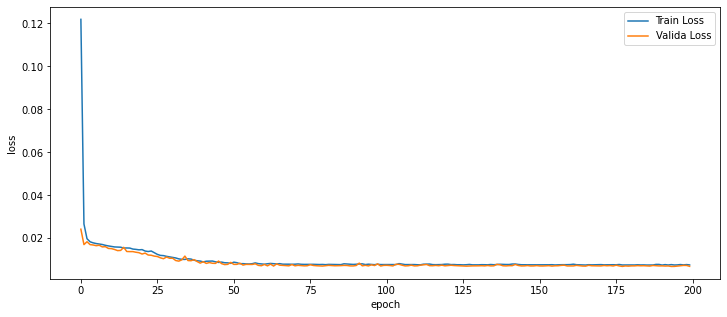

In [54]:
plt.figure(figsize=(12,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Valida Loss'], loc='upper right')
plt.show()

In [55]:
trainScore = model.evaluate(train_X, train_y, verbose = 0)
print('Train Score: ', trainScore)
testScore = model.evaluate(test_X, test_y, verbose = 0)
print('Test Score: ', testScore)

Train Score:  0.007500312756747007
Test Score:  0.00696641206741333


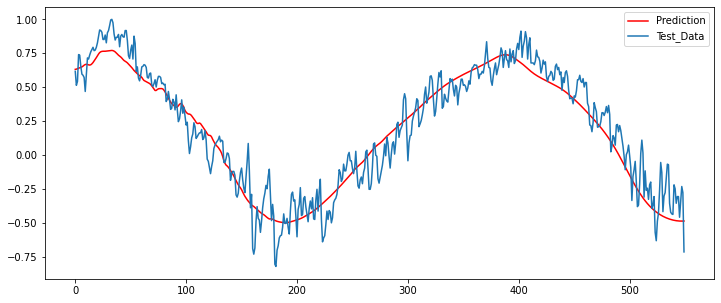

In [57]:
look_ahead =550

xhat = test_X[0]
predictions = np.zeros((look_ahead,1))

for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize = (12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label = 'Prediction')
plt.plot(np.arange(look_ahead), test_y[:look_ahead], label = 'Test_Data')
plt.legend()
plt.show()

In [70]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.33
session = InteractiveSession(config = config)

In [74]:
def create_data(time_data, look_back=1):
    data_X, data_y = [],[]
    for i in range(len(time_data)-look_back):
        data_X.append(time_data[i:(i+look_back)])
        data_y.append(time_data[i+look_back])
    return np.array(data_X), np.array(data_y)

In [75]:
look_back = 180

train_Xs, train_ys = create_data(train, look_back)
test_Xs, test_ys = create_data(test, look_back)

train_Xs =np.reshape(train_X, (train_X.shape[0], train_X.shape[1],1))
test_Xs = np.reshape(test_X, (test_X.shape[0], test_X.shape[1],1))

train_Xs.shape, train_ys.shape, test_Xs.shape, test_ys.shape

((2377, 180, 1), (2377, 1), (550, 180, 1), (550, 1))